In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.datasets import cifar10
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

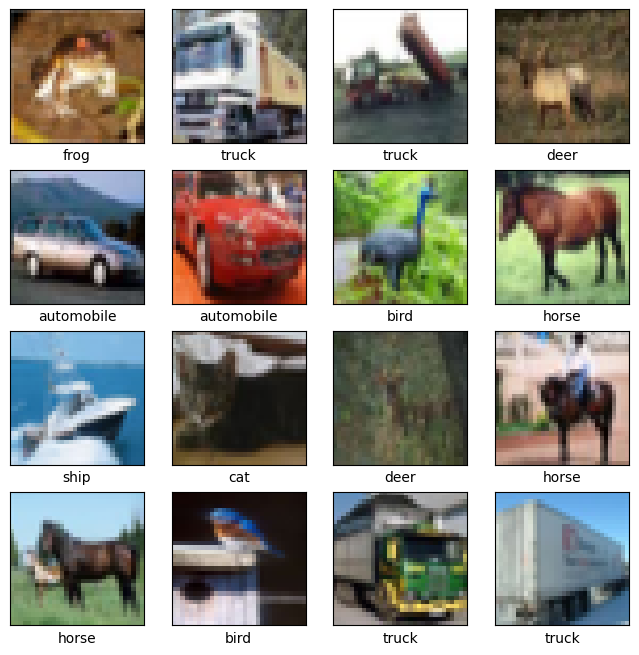

In [15]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i][0]])

plt.show()

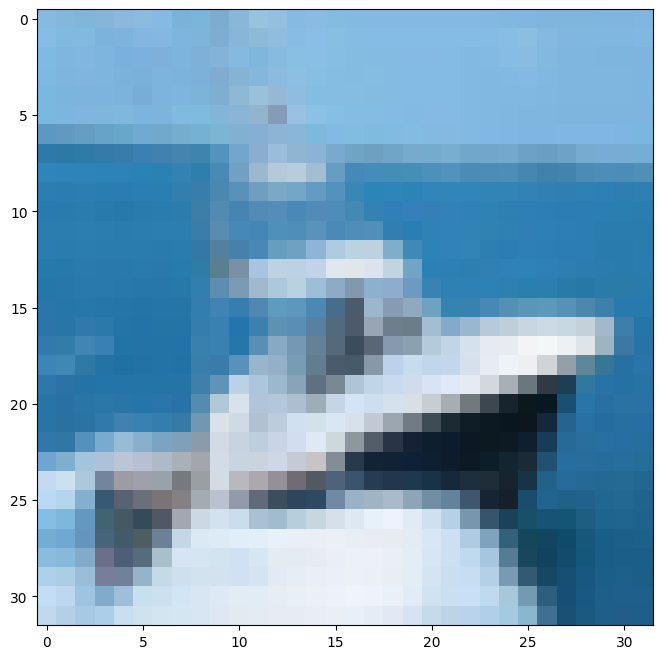

In [6]:
plt.imshow(X_train[8])

In [16]:
print("No. of training images: ", len(X_train))
print("No. of testing images: ", len(X_test))
print("Size of each image: ", len(X_train[0]), "x", len(X_train[0][0]), "x", len(X_train[0][0][0]))

No. of training images:  50000
No. of testing images:  10000
Size of each image:  32 x 32 x 3


In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.ravel())

In [21]:
y_test_pred = neigh.predict(X_test)
num_correct = np.sum(y_test_pred == y_test.ravel())
acc = float(num_correct)/len(X_test)
print("%d/%d correct => accuracy = %f" % (num_correct,len(X_test), acc))


3398/10000 correct => accuracy = 0.339800


In [24]:
print(f"{num_correct}/{len(X_test)}=> accuracy ={acc:.2f}")

3398/10000=> accuracy =0.34


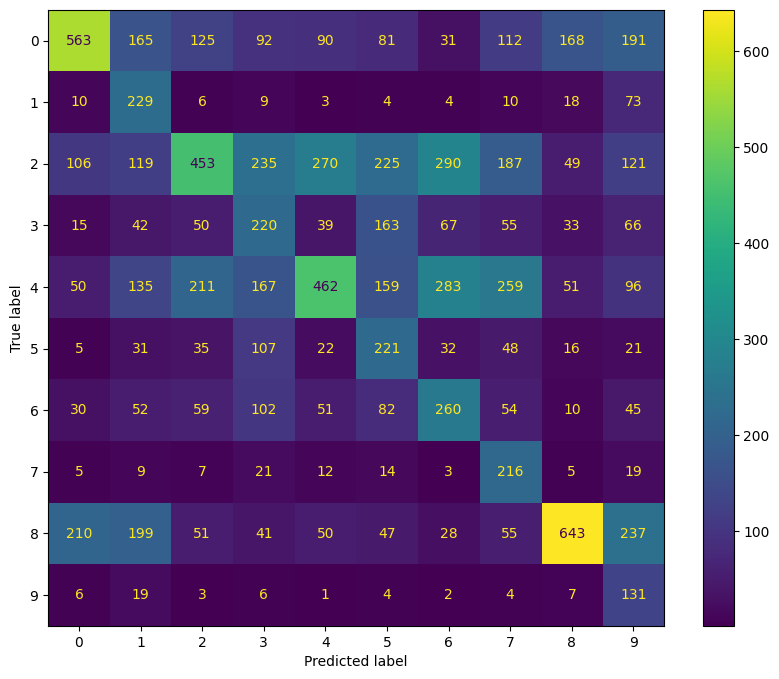

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_pred, y_test.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()